In [67]:
import torch
import torch.optim as optim
import torch.nn as nn

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_california_housing 

In [68]:
# Load dataset
df = fetch_california_housing(as_frame=True).frame # Import dataset as a pandas DataFrame
""" fetch_california_housing().DESCR prints the description below
:Number of Instances: 20640
:Number of Attributes: 8 numeric, predictive attributes and the target
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude
"""
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


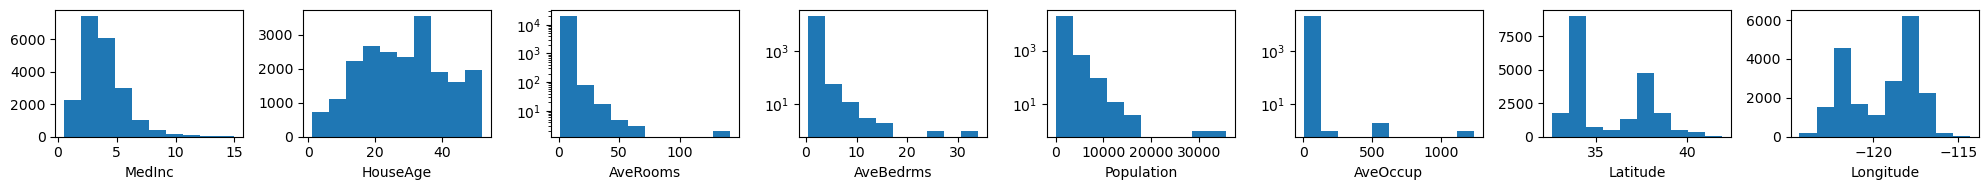

In [69]:

# Plot histograms of the features
fig, axs = plt.subplots(1, 8, figsize=(20, 2),sharey=False, tight_layout=True)

for i in range(8):
    axs[i].hist(df[df.columns[i]])

for i in range(8):
    axs[i].set_xlabel(df.columns[i])

# Some features are skewed, so we log-transform them
axs[2].set_yscale('log')
axs[3].set_yscale('log')
axs[4].set_yscale('log')
axs[5].set_yscale('log')

plt.show()

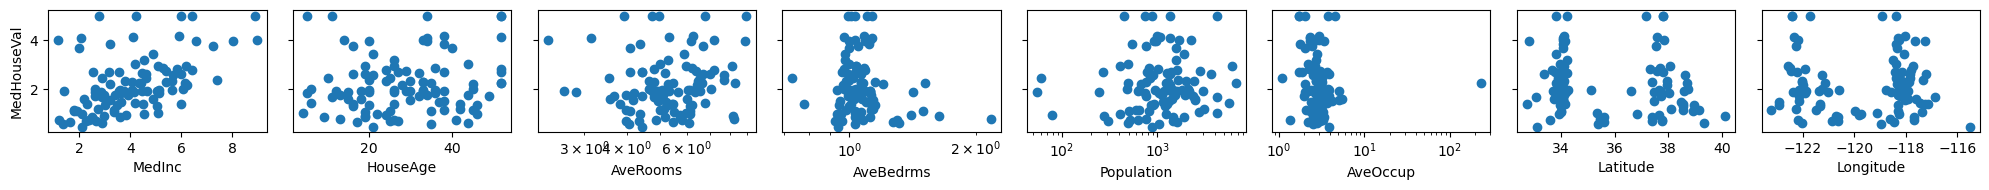

In [70]:

# Plot scatter plot of the features and the target
fig, axs = plt.subplots(1, 8, figsize=(20, 2),sharey=True, tight_layout=True)

df_sample = df.sample(100)

for i in range(8):
    axs[i].scatter(df_sample[df_sample.columns[i]], df_sample['MedHouseVal'])

for i in range(8):
    axs[i].set_xlabel(df.columns[i])

# Some features are skewed, so we log-transform them
axs[2].set_xscale('log')
axs[3].set_xscale('log')
axs[4].set_xscale('log')
axs[5].set_xscale('log')

axs[0].set_ylabel('MedHouseVal')

plt.show()

In [90]:
# Build a simple neural network model

class SimpleNN(nn.Module):
    '''
    A simple neural network model with two hidden layers
    - Input layer: 8 nodes (features)
    - Hidden layer: <numHiddleNodes1> nodes
    - Hidden layer: <numHiddleNodes2> nodes
    - Output layer: 1 node (target)
    '''
    def __init__(self, numHiddleNodes):
        '''
        Define the number of layers and the number of nodes in each layer
        '''
        super().__init__() # Inherit from nn.Module
        self.layer1 = nn.Linear(3, numHiddleNodes[0]) # Input layer -> hidden layer   
        self.layer2 = nn.Linear(numHiddleNodes[0], numHiddleNodes[1]) # Hidden layer -> hidden layer
        self.layer3 = nn.Linear(numHiddleNodes[1], 1) # Hidden layer -> output layer

        # Define the activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        '''
        Define the forward propagation, 
        a sequence of linear transformations and activation functions, 
        repeatation of ReLU(Weights x X + Bias) 
        '''
        x = self.layer1(x) # linear transformation
        x = self.relu(x) # activation function
        x = self.layer2(x) # linear transformation
        x = self.relu(x) # activation function
        x = self.layer3(x) # linear transformation
        return x
    
# Initialize the instance of the model
model = SimpleNN([5, 3])


In [93]:
# Choose the optimizer and learning rate
# Optimizer algorithm determins how to update the weights and biases at each backpropagation.

# The basic optimizer is a gradient decent, which calculate the gradient of the loss function at after each forward propagation, 
# and update the weights and biases in the oppisit direction of the gradient vector, 
# by the amout of the gradient vector multiplied by the learning rate. 

# However, empirically, the gradient decent optimizer sometimes not be able to find the global minimum of the loss function,
# got stuck in the saddle point.
# There are variations of the gradient decent optimizers to avoid the problem.
# Adam is one of the most popular optimizers designed to escape the saddle point efficiently and converge faster.

optimizer = optim.Adam(model.parameters(), lr=0.005)


# Choose the loss function
# The loss function is the difference between the predicted output and the true label.
loss = nn.MSELoss()

/opt/anaconda3/envs/tsml/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([16512])) that is different to the input size (torch.Size([16512, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 10/200, Loss: 2.9167
Epoch 20/200, Loss: 2.7698
Epoch 30/200, Loss: 3.2401
Epoch 40/200, Loss: 2.7031
Epoch 50/200, Loss: 2.6961
Epoch 60/200, Loss: 2.6230
Epoch 70/200, Loss: 2.5425
Epoch 80/200, Loss: 2.4858
Epoch 90/200, Loss: 2.4334
Epoch 100/200, Loss: 2.3811
Epoch 110/200, Loss: 2.3300
Epoch 120/200, Loss: 2.2804
Epoch 130/200, Loss: 2.2322
Epoch 140/200, Loss: 2.1854
Epoch 150/200, Loss: 2.1399
Epoch 160/200, Loss: 2.0959
Epoch 170/200, Loss: 2.0532
Epoch 180/200, Loss: 2.0119
Epoch 190/200, Loss: 1.9720
Epoch 200/200, Loss: 1.9333


/opt/anaconda3/envs/tsml/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([4128])) that is different to the input size (torch.Size([4128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


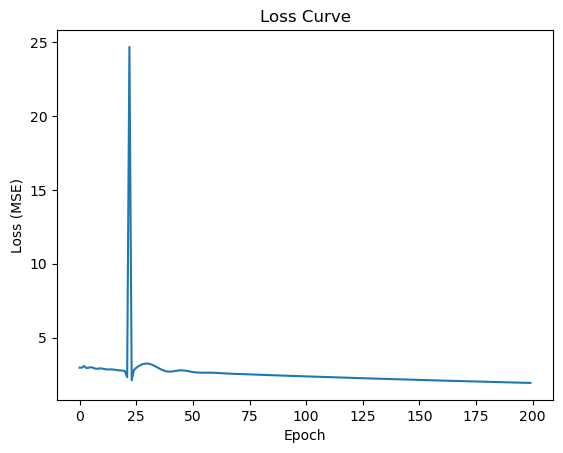

In [94]:
# Training the model

# create a tensor of the selectedinput features
X = torch.tensor(df[['MedInc','AveBedrms','Population']].values, dtype=torch.float32) 

# create a tensor of the target values
y = torch.tensor(df['MedHouseVal'].values, dtype=torch.float32)

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MSE_list = [] # Store the loss values for each epoch to plot the loss curve
num_epochs = 200 # One epoch is one forward and backward propagation of the entire dataset, after [dataset_size]/[batch_size] iterations.

for epoch in range(num_epochs):
    predictions = model(X_train) # Forward propagation
    MSE = loss(predictions,y_train ) # Calculate the loss
    MSE.backward() # Calculate the gradient
    optimizer.step() # Update the weights and biases
    optimizer.zero_grad() # Reset the gradients

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {MSE.item():.4f}")
    
    MSE_list.append(MSE.item())

# Test the model
model.eval()
with torch.no_grad(): # Disable gradient calculation, which is not needed for testing
    predictions = model(X_test)
    MSE = loss(predictions,y_test)

# Plot the loss curve
plt.plot(MSE_list)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.show()

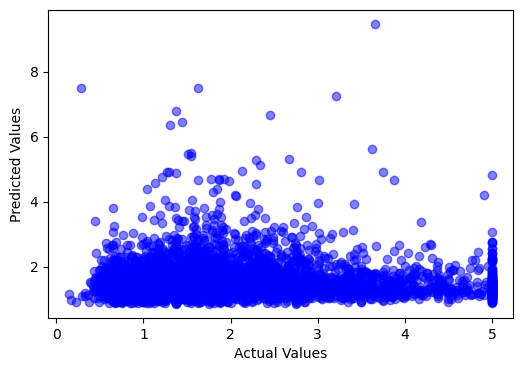

In [97]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, predictions, label='Predictions', alpha=0.5, color='blue')
#plt.xlim(2.6, 2.6)
#plt.ylim(2.6, 2.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


It doesn't look very good but this code itself is a good example about how to create a simple NN with pytorch.

In [96]:
# Save the model 
# The model is saved as a .pth file, which is a binary file that contains the model's parameters.
# To load the model, use torch.load('model.pth')
torch.save(model, 'house_price_model.pth') 
